In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import pandas as pd

In [2]:
from nltk.tag.stanford import StanfordPOSTagger

In [47]:

# https://www.kaggle.com/aashita/word-clouds-of-various-shapes/data
# def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), title = None, title_size=40, image_color=False):
#     stopwords = set(STOPWORDS)
#     # more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
#     # stopwords = stopwords.union(more_stopwords)

#     wordcloud = WordCloud(background_color='white',
#                     stopwords = stopwords,
#                     max_words = max_words,
#                     max_font_size = max_font_size, 
#                     random_state = 42,
#                     mask = mask)
#     wordcloud.generate(text)
    
#     plt.figure(figsize=figure_size)
#     if image_color:
#         image_colors = ImageColorGenerator(mask);
#         plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
#         plt.title(title, fontdict={'size': title_size,  
#                                   'verticalalignment': 'bottom'})
#     else:
#         plt.imshow(wordcloud);
#         plt.title(title, fontdict={'size': title_size, 'color': 'green', 
#                                   'verticalalignment': 'bottom'})
#     plt.axis('off');
#     plt.tight_layout()  

In [3]:
with open('../data/raw_answers.csv') as f:
    lines = f.readlines()

In [4]:
file_names = []
answers = []
for line in lines[1:]:
    splits = line.split(',')
    file_names.append(splits[0].strip())
    answers.append('\n'.join(splits[1:]))

In [5]:
df = pd.DataFrame(data={"file_name":file_names,"answer":answers})

In [9]:
df['text'] = df['answer']
df['text'].to_csv('temp.csv', index=None)

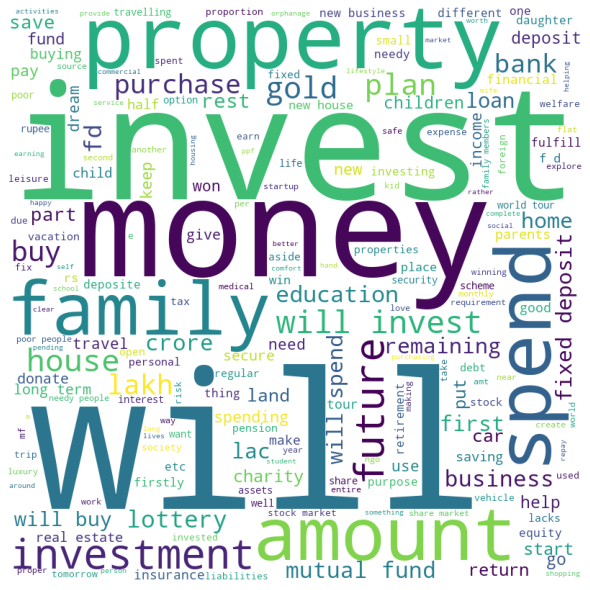

In [34]:
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.answer: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower().strip('.').strip(',').strip('"').strip('(').strip(')')
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

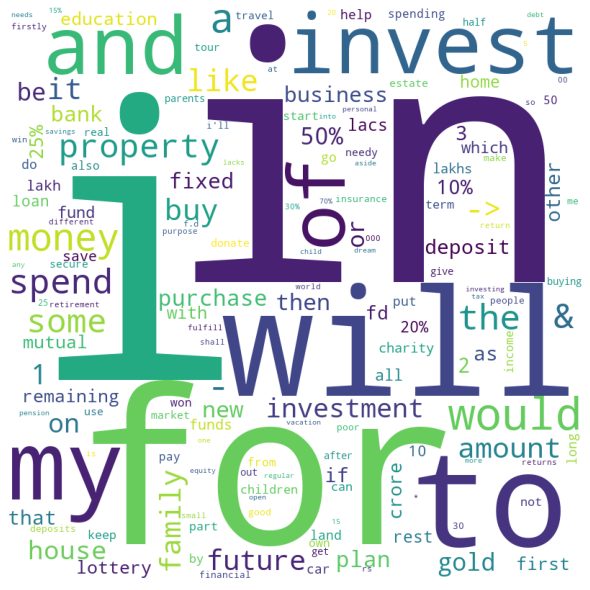

In [35]:
#.generate_from_frequencies()
import numpy as np
strings,counts = np.unique(comment_words.split(), return_counts=True)
frequencies = dict(zip(strings,counts))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(frequencies)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [36]:
sorted_freq = sorted(frequencies.items(), key = lambda x: x[1], reverse=True)

In [37]:
sorted_freq[:20]

[('i', 321),
 ('in', 254),
 ('for', 237),
 ('will', 198),
 ('to', 154),
 ('my', 152),
 ('invest', 151),
 ('and', 143),
 ('of', 136),
 ('would', 133),
 ('a', 107),
 ('money', 90),
 ('the', 81),
 ('spend', 79),
 ('&', 75),
 ('-', 72),
 ('some', 71),
 ('property', 70),
 ('like', 59),
 ('buy', 55)]

In [42]:
from tqdm.auto import tqdm

100%|██████████| 321/321 [15:00<00:00,  2.80s/it]


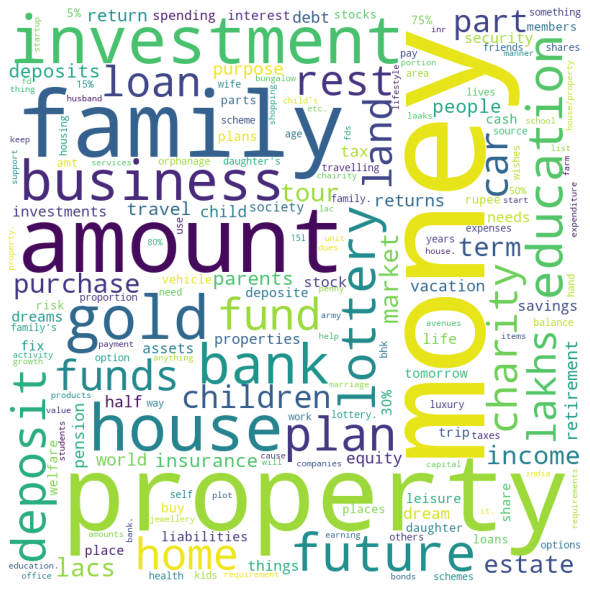

In [43]:
#.generate_from_frequencies()
import numpy as np
import nltk

jar = "./stanford_pos/stanford-postagger-4.2.0.jar"
model = "./stanford_pos/english-bidirectional-distsim.tagger"
 
pos_tagger = StanfordPOSTagger(model, jar, encoding = "utf-8")
 

tokens_pos=  []
for val in tqdm(df.answer): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    new_tokens = []
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower().strip('.').strip(',').strip('"').strip('(').strip(')').strip('<').strip('>')
        if tokens[i]!='':
            new_tokens.append(tokens[i])# Some might become empty
    
    token_pos = list(pos_tagger.tag(new_tokens))
    tokens_pos+= token_pos

tokensandpos = [text+'___'+pos for text,pos in tokens_pos ]
unique_tuples,counts = np.unique(tokensandpos, return_counts=True)
# counts_pos = list(zip(counts,pos_tags))
frequencies = dict(zip(unique_tuples,counts))
frequencies_2 = {k.split('___')[0]: v for k,v in frequencies.items() if k.split('___')[1] in ['NN','NNS','NNP','NNPS'] and k[0]!='~'} ## Check for all noun types, ignore crossed out words
# print(frequencies_2)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(frequencies_2)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

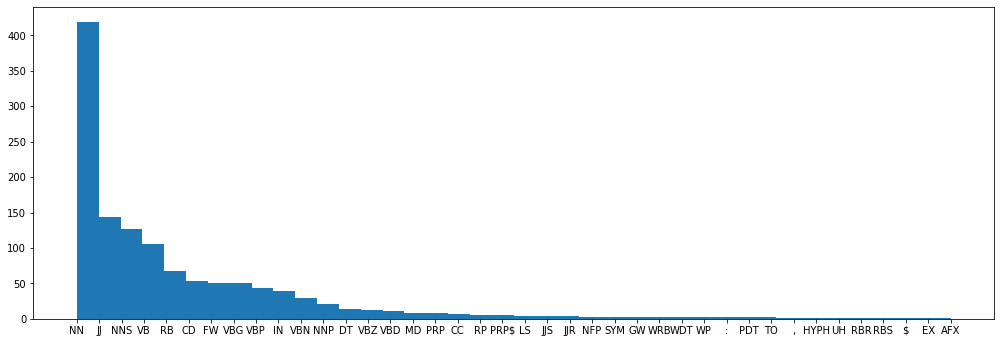

In [51]:
tag_fd = nltk.FreqDist(k.split('___')[1] for k in unique_tuples)
most_common = tag_fd.most_common()
val, weight = zip(*most_common)
plt.hist(val, weights=weight, bins = 40)
plt.tight_layout()
plt.gcf().set_size_inches(15,5)
plt.show()

In [69]:
tag_to_terms = {}
for unique_tuple, count in frequencies.items():
    term,tag = unique_tuple.split('___')
    if tag not in tag_to_terms:
        tag_to_terms[tag] = [(term, count)]
    else:
        tag_to_terms[tag].append((term,count))

for tag in tag_to_terms.keys():
    print(tag)
    sorted_unique_terms = sorted(tag_to_terms[tag], key = lambda x: x[1], reverse=True)
    print(sorted_unique_terms[:10])

NN
[('money', 90), ('property', 70), ('amount', 51), ('family', 51), ('investment', 44), ('house', 42), ('gold', 36), ('bank', 29), ('business', 29), ('50%', 25)]
CC
[('and', 143), ('&', 75), ('or', 35), ('either', 3), ('but', 2), ('ans', 1), ('for', 1)]
NFP
[('*', 6), ('-', 2), (':-', 1)]
SYM
[('+', 6), ('*', 1), ('-', 1)]
,
[('-', 19)]
:
[('-', 48), (':', 1)]
GW
[('-', 1), ('10%', 1), ('100%', 1)]
HYPH
[('-', 55)]
CD
[('1', 48), ('2', 28), ('3', 26), ('crore', 24), ('10', 18), ('50', 13), ('30', 10), ('25', 9), ('000', 8), ('00', 8)]
LS
[('1.', 1), ('1', 1), ('2.', 1), ('ii', 1)]
FW
[('in', 15), ('50%', 6), ('fd', 6), ('10%', 4), ('i.e', 4), ('i', 4), ('20%', 3), ('25%', 3), ('f.d', 3), ('etc.', 2)]
NNS
[('funds', 17), ('lakhs', 15), ('children', 14), ('lacs', 12), ('parents', 11), ('deposits', 10), ('people', 10), ('returns', 8), ('assets', 6), ('dreams', 6)]
NNP
[("i'll", 5), ('fd', 2), ('10l', 1), ('15', 1), ('25%', 1), ('30l', 1), ('60%', 1), ('ahmedabad', 1), ('amoutn', 1), ('bm

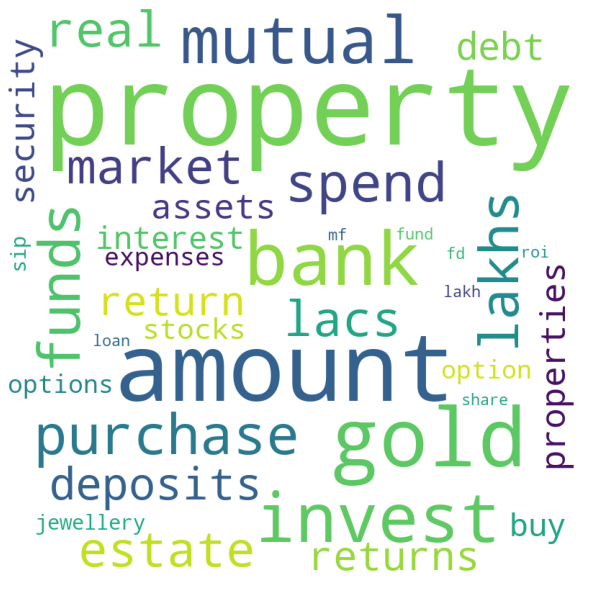

In [57]:
financial_terms = ['buy', 'sell', 'debt', 'funds', 'invest', 'stocks', 'share', 'gold', 'property', 'real','estate','coin','jewellery','fund','mutual','mf','fd','market','sip','roi','amount','loan','lacs','lakh','lakhs','debts','deposits','properties','assets','options','option','expenses','security','interest','mutual','purchase','return','returns','bank','spend']
frequencies_3 = {k.split('___')[0]: v for k,v in frequencies.items() if k.split('___')[0] in financial_terms and k[0]!='~'} ## Check for all noun types, ignore 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(frequencies_3)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Demographs vs Risk

# Radar Charts for MCQ

# Categorize Answers

# Embeddings

In [1]:
from transformers import BertTokenizer, BertModel, BertForSequenceClassification

## Before Fine-Tuning

### BERT-Base

#### Embeddings

In [2]:
from src.datasets import FinText
from torch.utils.data import DataLoader
from transformers import BertModel, BertTokenizerFast
import torch
from tqdm.auto import tqdm

In [3]:
data = FinText('temp.csv')
loader = DataLoader(data, batch_size=1,collate_fn = data.custom_collate_fn)

In [5]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [6]:
word_embeddings = {}
# Can use offset mapping to get the actual word in the data if needed.
with torch.no_grad():
    model.eval()
    for batch in tqdm(loader):
        sequence_output, *_ = model(**batch, return_dict=False)
        embeddings = sequence_output[0]
        tokens = tokenizer.convert_ids_to_tokens(batch['input_ids'][0]) #first sample
        current_token = ""
        embedding = None
        continuous_token_count = 0
        for token_idx, token in enumerate(tokens):
            if token in ["[CLS]","[PAD]","[SEP]"]:
                if token not in word_embeddings:
                    word_embeddings[token] = [embeddings[token_idx].numpy()] #first sample with this word
                else:
                    word_embeddings[token]+=[embeddings[token_idx].numpy()]
        
            elif token.startswith("##"): #subsequent tokens
                current_token+=token[2:] 
                continuous_token_count+=1
                embedding+=embeddings[token_idx].numpy()

            else:
                if tokens[token_idx-1]=="[CLS]": # First one
                    current_token=token
                    continuous_token_count = 1
                    embedding = embeddings[token_idx].numpy()
                else:
                    if current_token not in word_embeddings:
                        word_embeddings[current_token] = [embedding] # first sample with this word
                    else:
                        word_embeddings[current_token]+=[embedding]
                    current_token=token
                    continuous_token_count = 1
                    embedding = embeddings[token_idx].numpy()

100%|██████████| 321/321 [00:44<00:00,  7.23it/s]


In [7]:
import numpy as np

In [8]:
for key in tqdm(word_embeddings):
    word_embeddings[key] = np.mean(word_embeddings[key],axis=0)

100%|██████████| 970/970 [00:00<00:00, 7994.19it/s]


In [15]:
# # Sanity
# for key in word_embeddings:
#     if word_embeddings[key].shape!=(768,):
#         print(key)

In [32]:
for word in STOPWORDS:
    if word in word_embeddings:
        del word_embeddings[word]

In [34]:
from sklearn.decomposition import PCA
pca = PCA(2)
repres = pca.fit_transform(list(word_embeddings.values()))

In [35]:
import matplotlib.pyplot as plt

In [36]:
from wordcloud import STOPWORDS

In [37]:
repres_x = []
repres_y = []
words = []
for idx,key in enumerate(word_embeddings.keys()):
    if key in financial_terms:
        repres_x.append(repres[idx][0])
        repres_y.append(repres[idx][1])
        words.append(key)

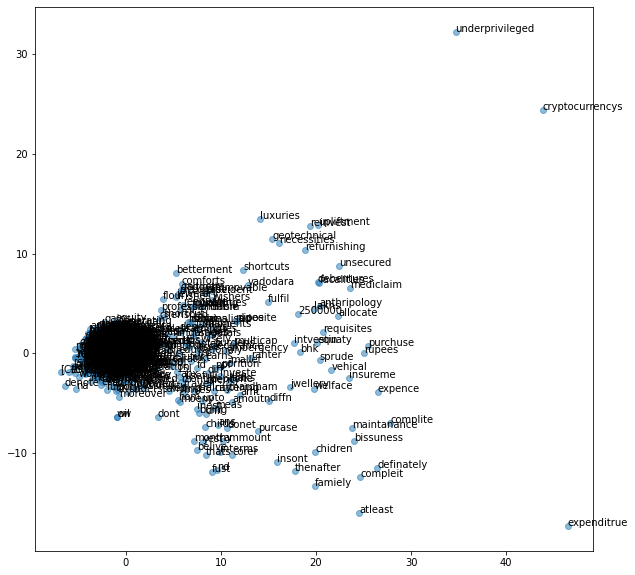

In [39]:
type = 'PCA'
fig = plt.figure(figsize=(10, 10)) 
financial_terms = ['buy', 'sell', 'debt', 'funds', 'invest', 'stocks', 'share', 'gold', 'property', 'real','estate','coin','jewellery','fund','mutual','mf','fd','market','sip','roi','amount','loan','lacs','lakh','lakhs','debts','deposits','properties','assets','options','option','expenses','security','interest','mutual','purchase','return','returns','bank','spend']

sc = plt.scatter(repres[:,0], repres[:,1], alpha=0.5, cmap='Spectral')
ax = plt.gca()
for i, txt in enumerate(word_embeddings.keys()):
    ax.annotate(txt, (repres[i,0], repres[i,1]))
# cbar = plt.colorbar(sc, ticks=sorted_unique_cs + 1/12, label='Years')
# cbar.ax.set_yticklabels(sorted_unique_years)
# cbar.ax.axes.tick_params(length=0)
plt.savefig(f'{type} Plot.png', bbox_inches='tight')
plt.show()
plt.close()